Implementing the quiz question here in code:
- Link 1: https://classroom.udacity.com/courses/ud600/lessons/4100878601/concepts/6512308860923
- Link 2: https://www.youtube.com/watch?time_continue=4&v=3kMLVzOK6D0 (video embedded below too, watch it for better understanding of the problem)

In [1]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/3kMLVzOK6D0?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

In [2]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Function for visualization of the map, utility and reward

In [43]:
def visualizeUtlitiyFunction(U, limits=np.array([-2, 2])):
    plt.figure()
    # plt.imshow(U)
    plt.imshow(np.reshape(U, newshape=(3,4)),
                interpolation='none', vmin=limits[0], vmax=limits[1])
    ax = plt.gca()
    
    # Major ticks
    ax.set_xticks(np.arange(0, 4, 1));
    ax.set_yticks(np.arange(0, 3, 1));

    # Labels for major ticks
    ax.set_xticklabels(np.arange(0, 4, 1));
    ax.set_yticklabels(np.arange(0, 3, 1));
    
    # Minor ticks
    ax.set_xticks(np.arange(-.5, 4, 1), minor=True);
    ax.set_yticks(np.arange(-.5, 3, 1), minor=True);
    
    ax.grid(which='minor',color='k', linestyle='-', linewidth=2)
    plt.colorbar()
    plt.show()

## Defining the grid world in code: utility, reward and map

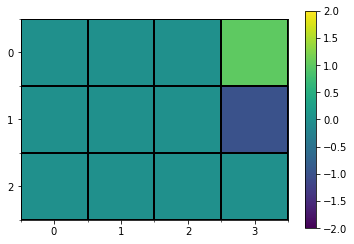

In [44]:
# Utility function of the grid world (defined in code)
U = np.zeros((3, 4))
U[0, 3] = 1
U[1, 3] = -1

visualizeUtlitiyFunction(U)

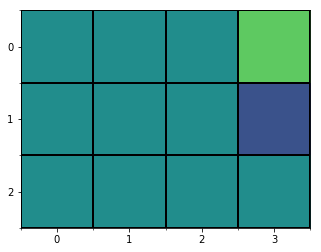

In [5]:
# Reward function
R = -0.04 * np.ones((3, 4))
R[0, 3] = 1
R[1, 3] = -1
visualizeUtlitiyFunction(R)

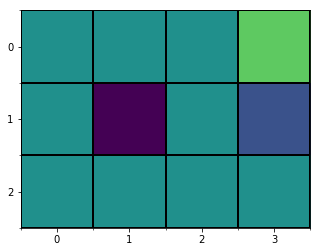

In [6]:
# Map function
gridMap = 0 * np.ones((3, 4)) # 0 -> normal cell, 1 -> goal cell, -1 -> die cell, -2 -> block cell
gridMap[0, 3] = 1
gridMap[1, 3] = -1
gridMap[1, 1] = -2
visualizeUtlitiyFunction(gridMap)

## Modeling and testing the physics of the world

In [7]:
def isStateSame(state1, state2, debug=False):
    if(debug):
        print("States are: ", state1, state2)
    if((state1[0]==state2[0]) and (state1[1]==state2[1])):
        if(debug):
            print("same state")
        return 1.0
    else:
        return 0.0

In [8]:
# Defining physics of the world T(s,a,s')
def T(presentState, action, nextState, debug=False):
    '''
        Returns a probability given the present state, next state and action.
    '''
    x1 = presentState[0]; y1 = presentState[1]
    x2 = nextState[0]; y2 = nextState[1]
    
    # Checking adjacency
    adjacencyValue = np.absolute(x1 - x2) + np.absolute(y1 - y2)
    
    if(not adjacencyValue <= 1):
        if(debug):
            print("adjacencyValue is <= 1")
            print("adjacencyValue = ", adjacencyValue, "; hence probability estimate is 0")
            
        return 0
    
    # apply action, get state (if same as next state: 0.8 score)
    nextStateEst1 = estimateNextState(presentState, action)
    # apply action + 1, get state (if same as next state: 0.1 score)
    nextStateEst2 = estimateNextState(presentState, (action + 1) % 4)
    # apply action - 1, get state (if same as next state: 0.1 score)
    nextStateEst3 = estimateNextState(presentState, (action - 1) % 4)
    
    probabilityValue = 0.8 * isStateSame(nextState,nextStateEst1) + 0.1 * isStateSame(nextState, nextStateEst2) + 0.1 * isStateSame(nextState, nextStateEst3)
    
    if(debug):
        print("Estimated next states are: ", nextStateEst1, nextStateEst2, nextStateEst3)
        print("isStateSame values are: ", isStateSame(nextState,nextStateEst1), isStateSame(nextState,nextStateEst2), isStateSame(nextState,nextStateEst3))
        print("probabilityValue: ", probabilityValue)
        
    return probabilityValue

In [9]:
def estimateNextState(presentState, action):
    x = presentState[0]
    y = presentState[1]
    
    if(action == 0):
        xtemp = x; ytemp = y - 1;
    elif(action == 1):
        xtemp = x - 1; ytemp = y;
    elif(action == 2):
        xtemp = x; ytemp = y + 1;
    elif(action == 3):
        xtemp = x + 1; ytemp = y;
        
    # checking for call: (i) make sure it don't hit wall cells, or (ii) cross boundaries
    if((xtemp < 0) or (xtemp > 2) or (ytemp < 0) or (ytemp > 3)):
        isWall = True
    elif((gridMap[xtemp, ytemp] == -2)):
        isWall = True
    else:
        isWall = False
        
    if(isWall): # if it is wall
        xtemp = x; ytemp = y; # next state same as present state
        
    newState = [xtemp, ytemp]
        
    return newState
            

In [10]:
T([2,3],0,[2,3],debug=False)

0.1

## Finding the policy using value iteration method

Algorithm:
- Start with arbitarary utilities
- Update utility based on neighbors
- Repeat until convergence

Initialization of utilities and rewards are already done, so not doing it again

In [11]:
import pdb

In [12]:
allPossibleStates = [(i,j) for i in range(3) for j in range(4)]

iterations left:  2
[[-0.04 -0.04  0.36  1.  ]
 [-0.04 -0.04 -0.04 -1.  ]
 [-0.04 -0.04 -0.04 -0.04]]


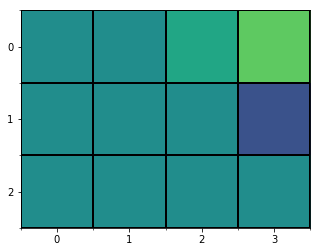

iterations left:  1
[[-0.06   0.1    0.376  1.   ]
 [-0.06  -0.06   0.052 -1.   ]
 [-0.06  -0.06  -0.06  -0.06 ]]


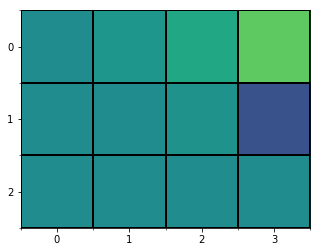

end of training


In [38]:
iterations = 2; gamma = 0.5; debug=False;
Uold = np.copy(U)
Unew = np.empty_like(U, dtype=float)
maxExpUtility = np.empty_like(U, dtype=float)

while(iterations > 0):
    print('iterations left: ', iterations)
    # Finding the action that maximizes expected utility\
    # loop for all present states
    for presentState in allPossibleStates:
        utilityMax = -100
        for acts in [0, 1, 2, 3]:

            totalUtility = 0
#             if(isStateSame(presentState, [0, 2]) and acts==2):
#                 pdb.set_trace()
            for nextState in allPossibleStates:
                stateUtlity = T(presentState, acts, nextState) * Uold[nextState]
                totalUtility = totalUtility + stateUtlity

            if(utilityMax < totalUtility):
                utilityMax = totalUtility

        maxExpUtility[presentState] = utilityMax
                
    if(debug):
        print(maxExpUtility)
        print(gamma * maxExpUtility)
        print("here")
    Unew = R + gamma * maxExpUtility
    
    # freezing utilities of terminal states
    Unew[0,3]= 1   
    Unew[1,3]= -1
    
    Uold = Unew
    
    print(Unew); visualizeUtlitiyFunction(Unew); 

    iterations = iterations - 1
    
print('end of training')

**As it can be seen above, the values of the utility of x after 1 iteration and 2 iterations are 0.36 and 0.376 respectively! This marks the end of the assignment. Below, I'm going to do some additional iterations to get a better understanding of how the training process works.**

## Running it for more iterations

iterations left:  10
[[-0.04 -0.04  0.36  1.  ]
 [-0.04 -0.04 -0.04 -1.  ]
 [-0.04 -0.04 -0.04 -0.04]]


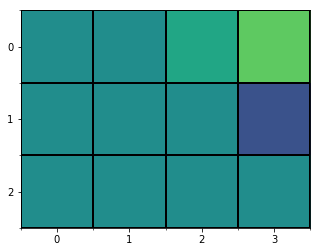

iterations left:  9
[[-0.06   0.1    0.376  1.   ]
 [-0.06  -0.06   0.052 -1.   ]
 [-0.06  -0.06  -0.06  -0.06 ]]


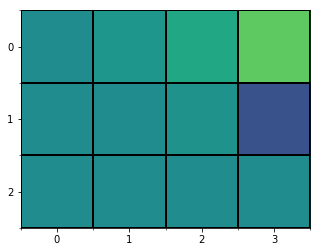

iterations left:  8
[[ -6.00000000e-03   1.20400000e-01   3.81400000e-01   1.00000000e+00]
 [ -7.00000000e-02  -4.00000000e-04   6.30000000e-02  -1.00000000e+00]
 [ -7.00000000e-02  -7.00000000e-02  -2.52000000e-02  -7.00000000e-02]]


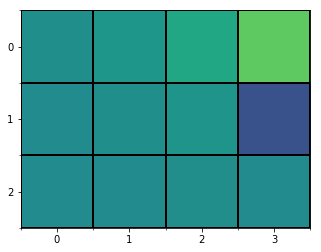

iterations left:  7
[[ 0.00436  0.1246   0.38222  1.     ]
 [-0.0494   0.00781  0.06571 -1.     ]
 [-0.075   -0.05708 -0.0218  -0.07276]]


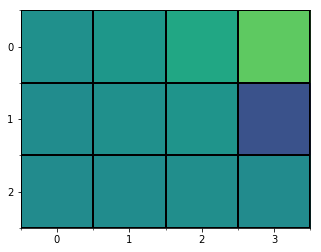

iterations left:  6
[[ 0.007588   0.125348   0.3823965  1.       ]
 [-0.043196   0.0106555  0.0661735 -1.       ]
 [-0.066364  -0.054428  -0.020208  -0.073832 ]]


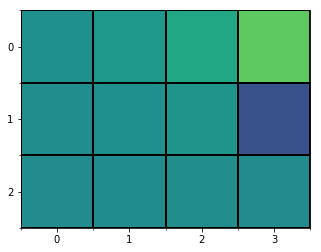

iterations left:  5
[[ 0.0083588   0.1254934   0.3824285   1.        ]
 [-0.0412844   0.01128808  0.06626728 -1.        ]
 [-0.063318   -0.053526   -0.0199436  -0.0742348 ]]


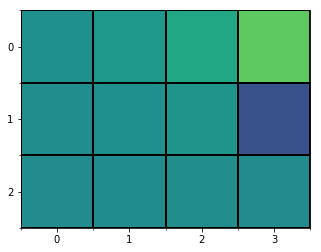

iterations left:  4
[[ 0.00855108  0.12552074  0.38243479  1.        ]
 [-0.04078492  0.0114465   0.06628476 -1.        ]
 [-0.06235596 -0.05333004 -0.01988113 -0.07440284]]


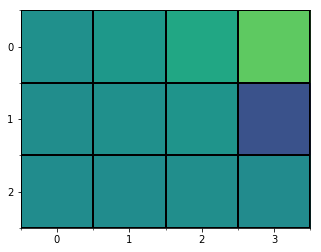

iterations left:  3
[[ 0.0085966   0.12552599  0.38243598  1.        ]
 [-0.04065806  0.01148329  0.06628815 -1.        ]
 [-0.06209827 -0.05328546 -0.01987274 -0.07447533]]


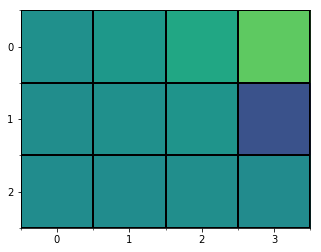

iterations left:  2
[[ 0.00860732  0.12552699  0.38243621  1.        ]
 [-0.04062716  0.0114919   0.0662888  -1.        ]
 [-0.06203241 -0.05327764 -0.01987278 -0.07450754]]


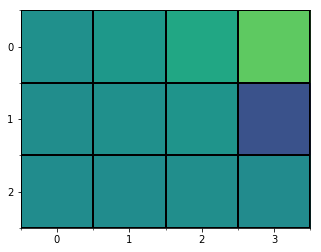

iterations left:  1
[[ 0.0086098   0.12552718  0.38243625  1.        ]
 [-0.04061979  0.01149388  0.06628892 -1.        ]
 [-0.06201637 -0.05327688 -0.01987374 -0.07452203]]


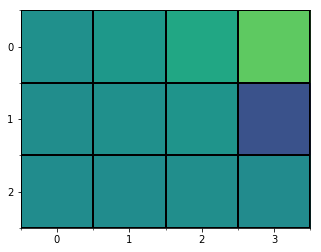

end of training


In [39]:
iterations = 10; gamma = 0.5; debug=False;
Uold = np.copy(U)
Unew = np.empty_like(U, dtype=float)
maxExpUtility = np.empty_like(U, dtype=float)

while(iterations > 0):
    print('iterations left: ', iterations)
    # Finding the action that maximizes expected utility\
    # loop for all present states
    for presentState in allPossibleStates:
        utilityMax = -100
        for acts in [0, 1, 2, 3]:

            totalUtility = 0
#             if(isStateSame(presentState, [0, 2]) and acts==2):
#                 pdb.set_trace()
            for nextState in allPossibleStates:
                stateUtlity = T(presentState, acts, nextState) * Uold[nextState]
                totalUtility = totalUtility + stateUtlity

            if(utilityMax < totalUtility):
                utilityMax = totalUtility

        maxExpUtility[presentState] = utilityMax
                
    if(debug):
        print(maxExpUtility)
        print(gamma * maxExpUtility)
        print("here")
    Unew = R + gamma * maxExpUtility
    
    # freezing utilities of terminal states
    Unew[0,3]= 1   
    Unew[1,3]= -1
    
    Uold = Unew
    
    print(Unew); visualizeUtlitiyFunction(Unew); 

    iterations = iterations - 1
    
print('end of training')

## As an additional thing, below is the implementation of the optimal policy too

In [45]:
policy = np.empty_like(U, dtype=int)
# Finding optimal policy in each state
for presentState in allPossibleStates:
    utilityMax = -100
    for acts in [0, 1, 2, 3]:

        totalUtility = 0
#             if(isStateSame(presentState, [0, 2]) and acts==2):
#                 pdb.set_trace()
        for nextState in allPossibleStates:
            stateUtlity = T(presentState, acts, nextState) * Unew[nextState]
            totalUtility = totalUtility + stateUtlity

        if(utilityMax < totalUtility):
            maxAct = acts
            utilityMax = totalUtility

    policy[presentState] = maxAct

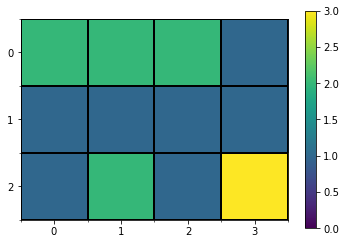

0->left 1->up 2->right 3->down


In [47]:
visualizeUtlitiyFunction(policy, limits=[0, 3])
print('0->left 1->up 2->right 3->down')

## Ignore everything below: rough work

In [16]:
grids = [(i,j) for i in range(4) for j in range(4)]
print(grids)

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]


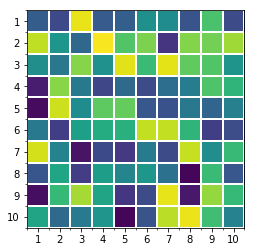

In [5]:
plt.figure()
im = plt.imshow(np.reshape(np.random.rand(100), newshape=(10,10)),
                interpolation='none', vmin=0, vmax=1, aspect='equal');

# ax = plt.gca();
ax = plt.gca();

# Major ticks
ax.set_xticks(np.arange(0, 10, 1));
ax.set_yticks(np.arange(0, 10, 1));

# Labels for major ticks
ax.set_xticklabels(np.arange(1, 11, 1));
ax.set_yticklabels(np.arange(1, 11, 1));

# Minor ticks
ax.set_xticks(np.arange(-.5, 10, 1), minor=True);
ax.set_yticks(np.arange(-.5, 10, 1), minor=True);

# Gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

In [ ]:
# Defining actions that can be taken
actions = np.array([0, 1, 2, 3]) # 0-left, 1-up, 2-right, 3-down

# Modeling the stocasticity of actions
if(False): # might need this for monte carlo simulations in future
    actionCommanded = action
    randomNumber = np.random.rand(1)
    if (randomNumber < 0.8):
        actionExecuted = actionCommanded
    elif(randomNumber < 0.9):
        actionExecuted = (actionCommanded - 1) % 4
    else:
        actionExecuted = (actionCommanded + 1) % 4